# 12. 상관 분석

## 12.1 분석을 위한 기본 설정

### 12.1.1 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<br>

### 12.1.2 시각화를 위한 한글 폰트 설정

In [2]:
import platform

# 설정 가능한 그래프 스타일 확인
#print(plt.style.available)

# 그래프 스타일 설정 (seaborn-whitegrid)
plt.style.use('seaborn-whitegrid') # seaborn 스타일 설정은 폰트 설정 이전에 실행해야 한다.

# 한글 폰트 설정
from matplotlib import font_manager, rc

# 일반 폰트 설정
font_fname = ''
if 'Windows' in platform.system(): # 윈도우
    font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'
elif 'Darwin' in platform.system(): # 맥 OS
    font_fname = '' # 맥 OS 폰트 경로
elif 'Linux' in platform.system(): # 리눅스
    font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

# 마이너스 폰트 설정
rc('axes', unicode_minus=False)

# retina display 적용 (선명하게)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

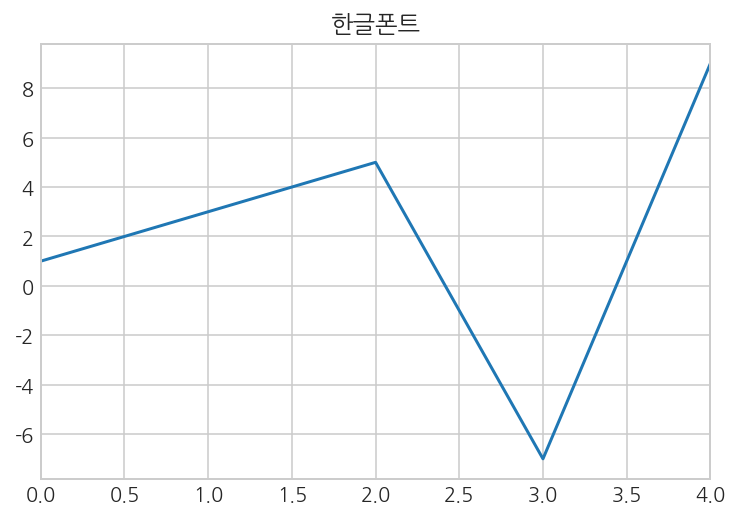

In [3]:
# 설정 확인
g = pd.Series([1, 3, 5, -7, 9]).plot(title='한글폰트')

<br>

### 12.1.3 데이터 불러오기

In [4]:
df = pd.read_csv('etf_2021-02-03.csv', dtype={'종목코드': np.object})
df.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지
0,069500,1,KODEX 200,43130,2,355,0.83,43214.0,39.9522,8521906,366352,62625,국내 시장지수,KODEX,False,False,False
1,102110,1,TIGER 200,42970,2,360,0.84,43038.0,39.9710,1650818,70651,31347,국내 시장지수,TIGER,False,False,False
2,252670,3,KODEX 200선물인버스2X,2055,5,-35,-1.67,2051.0,-51.2821,642008913,1329284,20227,국내 파생,KODEX,True,False,False
3,122630,3,KODEX 레버리지,27825,2,475,1.74,28022.0,92.0646,46157932,1275107,19088,국내 파생,KODEX,False,True,False
4,102780,2,KODEX 삼성그룹,10530,2,70,0.67,10545.0,37.6315,612363,6415,18522,국내 업종/테마,KODEX,False,False,False


## 12.2 상관 분석(Correlation Analsys) 이란?

- 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는 지 분석하는 방법

**상관 계수 (Correlation coefficient)**

- 상관관계의 정도를 파악
- 두 변수 간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아님
  - 두 변수 간에 원인과 결과의 인과관계가 있는 지에 대한 것은 **회귀분석**을 통해 확인해볼 수 있다.

<br>

## 12.3 피어슨 상관계수

### 12.3.1 R

- X와 Y가 완전히 동일 -> +1
- x와 y가 전혀 다름 -> 0
- x와 y가 반대방향으로 완전히 동일 -> -1  
  
<div style="text-align:left; margin-left: 20px;">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" style="width:500px" />
</div>

<br>

### 12.3.2 결정계수 (coefficient of determination)

- R^2 로 계산
- X로부터 Y를 예측할 수 있는 정도를 의미

<br>

### 12.3.3 값의 범위별 상관관계

- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계
- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계
- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계
- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계
- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계
- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계
- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

<div style="text-align:left; margin-left: 20px;">
<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" style="width:500px" />
</div>

<br>

## 12.4 상관계수 구하기

In [6]:
corr = df.corr()
corr

,탭코드,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),인버스,레버리지,환헤지
탭코드,1.000000,0.377207,0.250931,-0.298602,-0.310933,0.523673,-0.484049,-0.011755,-0.032177,-0.121696,0.184196,0.026849,0.266832
현재가,0.377207,1.000000,-0.004994,0.035276,-0.109433,0.999998,-0.116015,-0.047253,-0.013059,0.121496,-0.075946,-0.001193,-0.157071
등락구분,0.250931,-0.004994,1.000000,-0.511913,-0.636218,0.038165,-0.478794,0.116468,0.065774,-0.060308,0.310880,0.027951,0.151929
전일비,-0.298602,0.035276,-0.511913,1.000000,0.784792,-0.045787,0.529959,-0.038982,0.039631,0.110467,-0.230355,0.176032,-0.064275
등락률,-0.310933,-0.109433,-0.636218,0.784792,1.000000,-0.198180,0.538266,-0.112836,-0.050400,-0.004049,-0.319566,0.142721,-0.095367
순자산가치(NAV),0.523673,0.999998,0.038165,-0.045787,-0.198180,1.000000,-0.166050,-0.057768,-0.026486,0.103059,-0.053206,0.002782,NaN
3개월수익률,-0.484049,-0.116015,-0.478794,0.529959,0.538266,-0.166050,1.000000,-0.150357,-0.009578,0.099830,-0.499360,0.369729,-0.141231
거래량,-0.011755,-0.047253,0.116468,-0.038982,-0.112836,-0.057768,-0.150357,1.000000,0.757522,0.255554,0.175541,-0.000407,-0.024651
거래대금(백만),-0.032177,-0.013059,0.065774,0.039631,-0.050400,-0.026486,-0.009578,0.757522,1.000000,0.468744,0.124906,0.114543,-0.042590
시가총액(억),-0.121696,0.121496,-0.060308,0.110467,-0.004049,0.103059,0.099830,0.255554,0.468744,1.000000,-0.017669,0.003235,-0.074694


<br>

## 12.5 상관계수 시각화

### 12.5.1 `seaborn`의 `heatmap`을 이용하여 상관계수 시각화

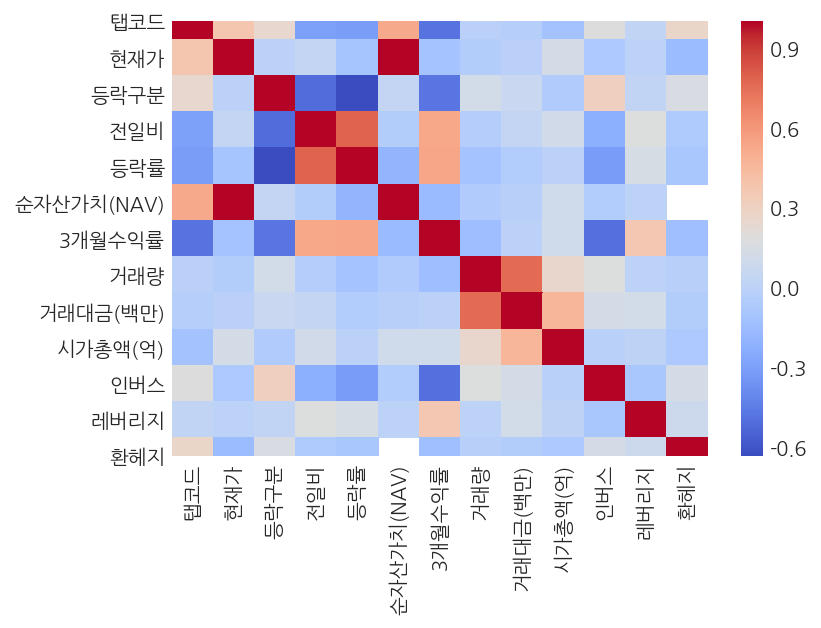

In [9]:
sns.heatmap(corr, cmap='coolwarm')

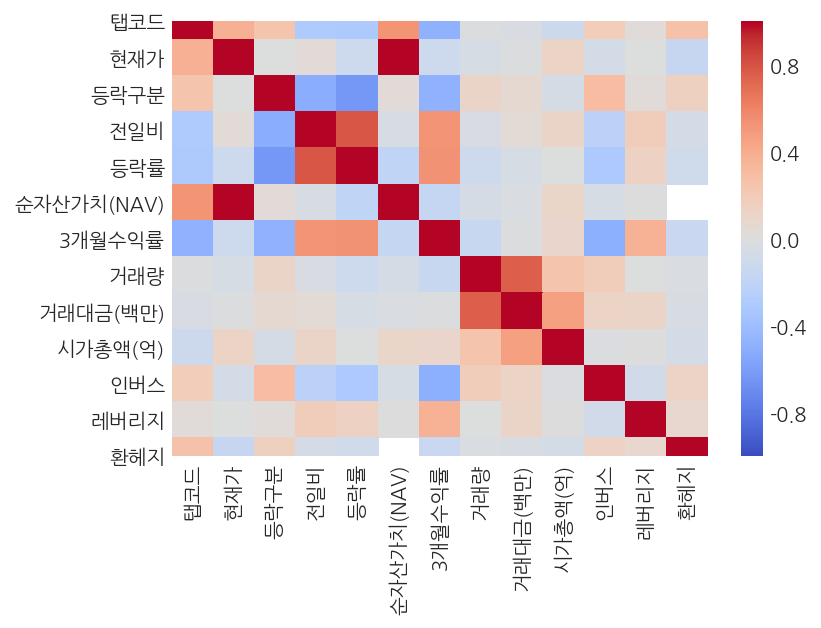

In [14]:
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1)

<br>

### 12.5.2 `numpy`를 활용하여 생성한 `mask` 적용

In [16]:
np.ones_like(corr) # corr 와 크기만 같은 1로 채워진 array 생성

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [19]:
# np.triu(array) : array에서 상삼각행렬에 해당하는 데이터만 유지하고 나머지 데이터를 0으로 만듬
mask = np.triu(np.ones_like(corr)) 
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

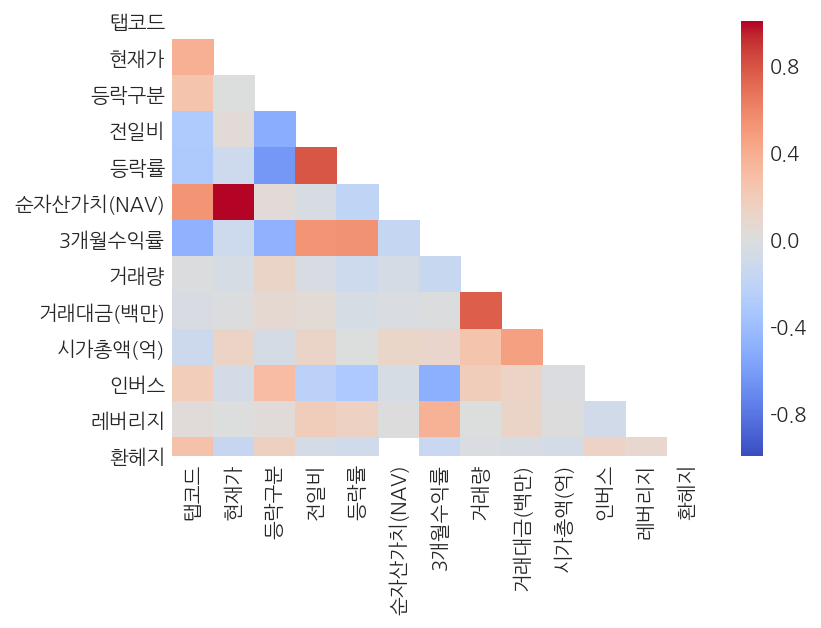

In [20]:
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1, mask=mask)

<br>

### 12.5.3 `annot` 속성 활용하여 상관계수 값 표출

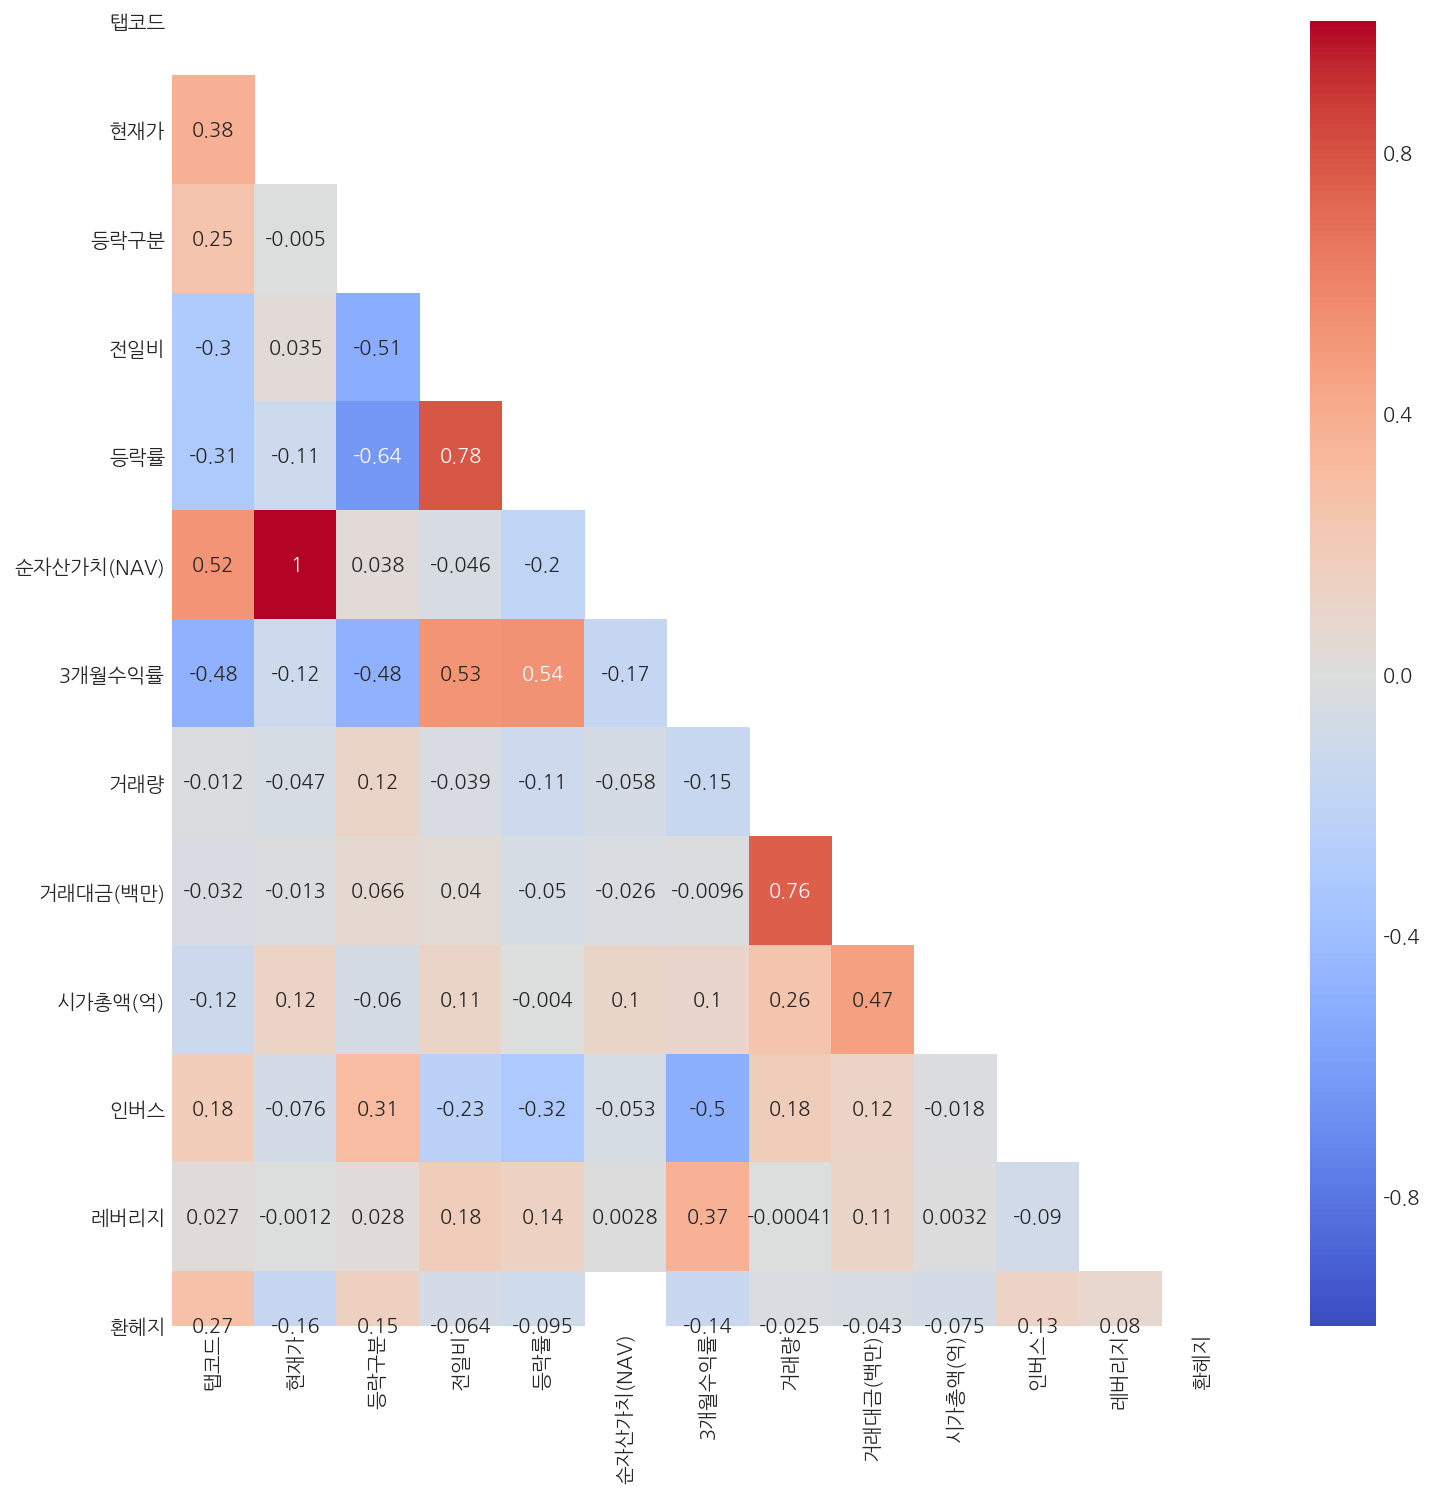

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1, mask=mask, annot=True)

<br>

## 12.6 변수별 상관 계수

- 양 혹은 음의 상관 계수가 높은 변수끼리의 `regplot` 그리기
- `regplot`은 회귀 선도 함께 그려준다.

<br>

### 12.6.1 양의 상관 계수가 높은 경우

- 전일비 vs 등락률 (r = 0.78)

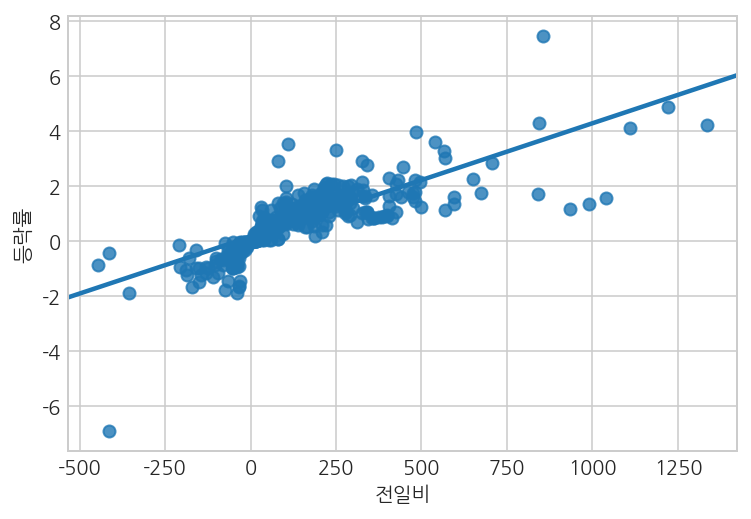

In [24]:
sns.regplot(data=df, x='전일비', y='등락률', ci=None)

<br>

### 12.6.2 음의 상관 계수가 높은 경우

- 등락률 vs 등락구분 (r = -0.64)

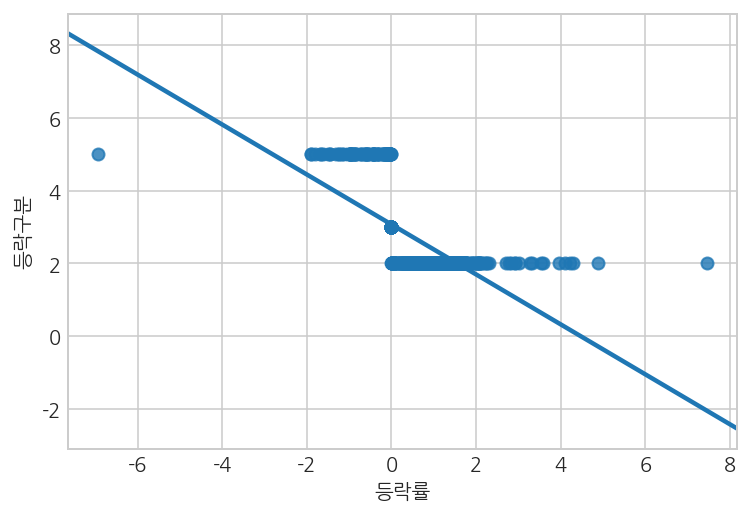

In [25]:
sns.regplot(data=df, x='등락률', y='등락구분', ci=None)

<br>

## 12.7 종목별 상관 계수

### 12.7.1 수치 데이터 추출

- `select_dtypes` 를 통해 `object` 타입을 제외한 타입을 가져온다.

In [28]:
# df.select_dtypes(exclude=np.object) 와 동일
df_num = df.select_dtypes(include=np.number).copy()
df_num

,탭코드,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억)
0,1,43130,2,355,0.83,43214.0,39.9522,8521906,366352,62625
1,1,42970,2,360,0.84,43038.0,39.9710,1650818,70651,31347
2,3,2055,5,-35,-1.67,2051.0,-51.2821,642008913,1329284,20227
3,3,27825,2,475,1.74,28022.0,92.0646,46157932,1275107,19088
4,2,10530,2,70,0.67,10545.0,37.6315,612363,6415,18522
...,...,...,...,...,...,...,...,...,...,...
464,2,8485,2,20,0.24,8481.0,16.7586,282,2,22
465,5,5495,2,30,0.55,NaN,-1.5316,1816,9,22
466,4,6030,2,30,0.50,NaN,4.8951,4614,27,18
467,2,7245,2,25,0.35,7246.0,25.5652,3443,24,17


<br>

### 12.7.2 종목명 인덱스로 할당

In [30]:
df_num['종목명'] = df['종목명']
df_num = df_num.set_index('종목명')
df_num

,탭코드,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억)
종목명,,,,,,,,,,
KODEX 200,1,43130,2,355,0.83,43214.0,39.9522,8521906,366352,62625
TIGER 200,1,42970,2,360,0.84,43038.0,39.9710,1650818,70651,31347
KODEX 200선물인버스2X,3,2055,5,-35,-1.67,2051.0,-51.2821,642008913,1329284,20227
KODEX 레버리지,3,27825,2,475,1.74,28022.0,92.0646,46157932,1275107,19088
KODEX 삼성그룹,2,10530,2,70,0.67,10545.0,37.6315,612363,6415,18522
...,...,...,...,...,...,...,...,...,...,...
KBSTAR 200중공업,2,8485,2,20,0.24,8481.0,16.7586,282,2,22
KBSTAR 팔라듐선물인버스(H),5,5495,2,30,0.55,NaN,-1.5316,1816,9,22
KBSTAR 미국장기국채선물인버스2X(합성 H),4,6030,2,30,0.50,NaN,4.8951,4614,27,18


<br>

### 12.7.3 행, 열 변환

In [31]:
df_t = df_num.T
df_t.head()

종목명,KODEX 200,TIGER 200,KODEX 200선물인버스2X,KODEX 레버리지,KODEX 삼성그룹,KODEX 200TR,KODEX 단기채권,KODEX MSCI Korea TR,TIGER MSCI Korea TR,KODEX 종합채권(AA-이상)액티브,...,TIGER 일본엔선물인버스2X,TIGER 금속선물(H),ARIRANG KRX300IT,KBSTAR 200경기소비재,KBSTAR 200금융,KBSTAR 200중공업,KBSTAR 팔라듐선물인버스(H),KBSTAR 미국장기국채선물인버스2X(합성 H),KBSTAR 200철강소재,KBSTAR 200산업재
탭코드,1.00,1.00,3.00,3.00,2.00,1.00,6.00,1.00,1.00,6.00,...,7.00,5.00,2.00,2.00,2.00,2.00,5.00,4.0,2.00,2.00
현재가,43130.00,42970.00,2055.00,27825.00,10530.00,13900.00,102690.00,13900.00,17525.00,109870.00,...,8510.00,5595.00,20715.00,12715.00,7705.00,8485.00,5495.00,6030.0,7245.00,10750.00
등락구분,2.00,2.00,5.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.00,5.00,2.00,2.00,2.00,2.00,2.00,2.0,2.00,2.00
전일비,355.00,360.00,-35.00,475.00,70.00,125.00,10.00,85.00,150.00,15.00,...,25.00,-5.00,135.00,485.00,35.00,20.00,30.00,30.0,25.00,220.00
등락률,0.83,0.84,-1.67,1.74,0.67,0.91,0.01,0.62,0.86,0.01,...,0.29,-0.09,0.66,3.97,0.46,0.24,0.55,0.5,0.35,2.09


<br>

### 12.7.4 데이터 타입 float 으로 변환 후 상관계수 구하기

In [33]:
etf_corr = df_t.astype(float).corr()
etf_corr

종목명,KODEX 200,TIGER 200,KODEX 200선물인버스2X,KODEX 레버리지,KODEX 삼성그룹,KODEX 200TR,KODEX 단기채권,KODEX MSCI Korea TR,TIGER MSCI Korea TR,KODEX 종합채권(AA-이상)액티브,...,TIGER 일본엔선물인버스2X,TIGER 금속선물(H),ARIRANG KRX300IT,KBSTAR 200경기소비재,KBSTAR 200금융,KBSTAR 200중공업,KBSTAR 팔라듐선물인버스(H),KBSTAR 미국장기국채선물인버스2X(합성 H),KBSTAR 200철강소재,KBSTAR 200산업재
종목명,,,,,,,,,,,,,,,,,,,,,
KODEX 200,1.000000,0.999604,0.999212,0.999878,0.998957,0.997646,-0.074812,0.996310,0.992021,-0.136350,...,-0.148259,0.146635,-0.160502,-0.070181,0.243028,-0.145751,0.199441,0.539715,0.185356,-0.168877
TIGER 200,0.999604,1.000000,0.998872,0.999390,0.999340,0.998868,-0.047934,0.998018,0.995007,-0.109829,...,-0.122778,0.165785,-0.135094,-0.044589,0.267849,-0.120274,0.218368,0.555863,0.210520,-0.143525
KODEX 200선물인버스2X,0.999212,0.998872,1.000000,0.999680,0.999447,0.998055,-0.072982,0.996738,0.992403,-0.134322,...,-0.145966,0.148549,-0.158195,-0.067624,0.245509,-0.143451,0.201404,0.541633,0.187853,-0.166488
KODEX 레버리지,0.999878,0.999390,0.999680,1.000000,0.999157,0.997677,-0.077206,0.996260,0.991776,-0.138568,...,-0.149984,0.145434,-0.162208,-0.071788,0.241498,-0.147469,0.198297,0.538891,0.183792,-0.170543
KODEX 삼성그룹,0.998957,0.999340,0.999447,0.999157,1.000000,0.999528,-0.053995,0.998791,0.995613,-0.116115,...,-0.130537,0.160133,-0.142865,-0.052327,0.260390,-0.128050,0.212772,0.551181,0.202943,-0.151249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KBSTAR 200중공업,-0.145751,-0.120274,-0.143451,-0.147469,-0.128050,-0.103527,0.989649,-0.090529,-0.048131,0.994951,...,0.999995,0.970684,0.999883,0.996743,0.924146,1.000000,0.956393,0.786318,0.945089,0.999637
KBSTAR 팔라듐선물인버스(H),0.199441,0.218368,0.201404,0.198297,0.212772,0.230684,0.966056,0.239938,0.270453,0.951206,...,0.955400,0.998531,0.950361,0.980688,0.978739,0.956393,1.000000,0.932474,0.990840,0.946680
KBSTAR 미국장기국채선물인버스2X(합성 H),0.539715,0.555863,0.541633,0.538891,0.551181,0.566132,0.829067,0.573670,0.598752,0.786194,...,0.784213,0.911724,0.773805,0.844795,0.986739,0.786318,0.932474,1.000000,0.972689,0.766509


<br>

### 12.7.5 "KODEX 200"과 상관계수가 높은 ETF 상위 10개

In [36]:
etf_corr['KODEX 200'].sort_values(ascending=False).head(10)

종목명
KODEX 200            1.000000
KODEX 레버리지           0.999878
KODEX 자동차            0.999818
KODEX 2차전지산업         0.999740
TIGER 200선물레버리지      0.999694
TIGER 2차전지테마         0.999684
TIGER KRX2차전지K-뉴딜    0.999683
KODEX 코스닥150 레버리지    0.999654
KODEX 코스닥 150        0.999607
TIGER 200            0.999604
Name: KODEX 200, dtype: float64

<br>

### 12.7.6 "KODEX 200"과 상관계수가 낮은 ETF 상위 10개

In [37]:
etf_corr['KODEX 200'].sort_values().head(10)

종목명
HANARO MSCI Korea TR   -0.192416
TIGER CD금리투자KIS(합성)    -0.177955
KBSTAR 코스피             -0.174622
KBSTAR 중소형모멘텀로우볼       -0.171718
KBSTAR 모멘텀로우볼          -0.171634
HANARO 단기통안채           -0.171364
KODEX 최소변동성            -0.170941
FOCUS KRX300           -0.170909
TREX 펀더멘탈 200          -0.170893
KBSTAR 중소형모멘텀밸류        -0.170756
Name: KODEX 200, dtype: float64

<br>

## 12.8 2X ETF의 상관 계수

### 12.8.1 2X가 들어가는 ETF의 상관 계수만 가져오기

In [40]:
etf_corr_2x = etf_corr.filter(regex='2X').filter(regex='2X', axis=0)
etf_corr_2x

종목명,KODEX 200선물인버스2X,TIGER 200선물인버스2X,KBSTAR 200선물인버스2X,KOSEF 미국달러선물인버스2X,ARIRANG 200선물인버스2X,TIGER 미국달러선물인버스2X,KOSEF 200선물인버스2X,KBSTAR KRX국채선물3년10년스티프너2X,KBSTAR KRX국채선물3년10년플래트너2X,KODEX 미국달러선물인버스2X,TIGER 일본엔선물인버스2X,KBSTAR 미국장기국채선물인버스2X(합성 H)
종목명,,,,,,,,,,,,
KODEX 200선물인버스2X,1.000000,1.000000,0.999998,-0.051637,0.999840,-0.131841,0.999930,-0.167166,-0.167046,0.286664,-0.145966,0.541633
TIGER 200선물인버스2X,1.000000,1.000000,0.999999,-0.051196,0.999848,-0.131405,0.999935,-0.166733,-0.166613,0.287086,-0.145531,0.541912
KBSTAR 200선물인버스2X,0.999998,0.999999,1.000000,-0.049634,0.999873,-0.129853,0.999952,-0.165191,-0.165070,0.288584,-0.143983,0.542904
KOSEF 미국달러선물인버스2X,-0.051637,-0.051196,-0.049634,1.000000,-0.033867,0.996737,-0.039847,0.993143,0.993158,0.941868,0.995427,0.856212
ARIRANG 200선물인버스2X,0.999840,0.999848,0.999873,-0.033867,1.000000,-0.114191,0.999980,-0.149606,-0.149484,0.303662,-0.128349,0.552866
TIGER 미국달러선물인버스2X,-0.131841,-0.131405,-0.129853,0.996737,-0.114191,1.000000,-0.120134,0.999326,0.999329,0.911847,0.999876,0.795873
KOSEF 200선물인버스2X,0.999930,0.999935,0.999952,-0.039847,0.999980,-0.120134,1.000000,-0.155522,-0.155402,0.297948,-0.134283,0.549105
KBSTAR KRX국채선물3년10년스티프너2X,-0.167166,-0.166733,-0.165191,0.993143,-0.149606,0.999326,-0.155522,1.000000,1.000000,0.896622,0.999767,0.766021
KBSTAR KRX국채선물3년10년플래트너2X,-0.167046,-0.166613,-0.165070,0.993158,-0.149484,0.999329,-0.155402,1.000000,1.000000,0.896675,0.999768,0.766122


<br>

### 12.8.2 seaborn의 heatmap으로 상관 계수 시각화

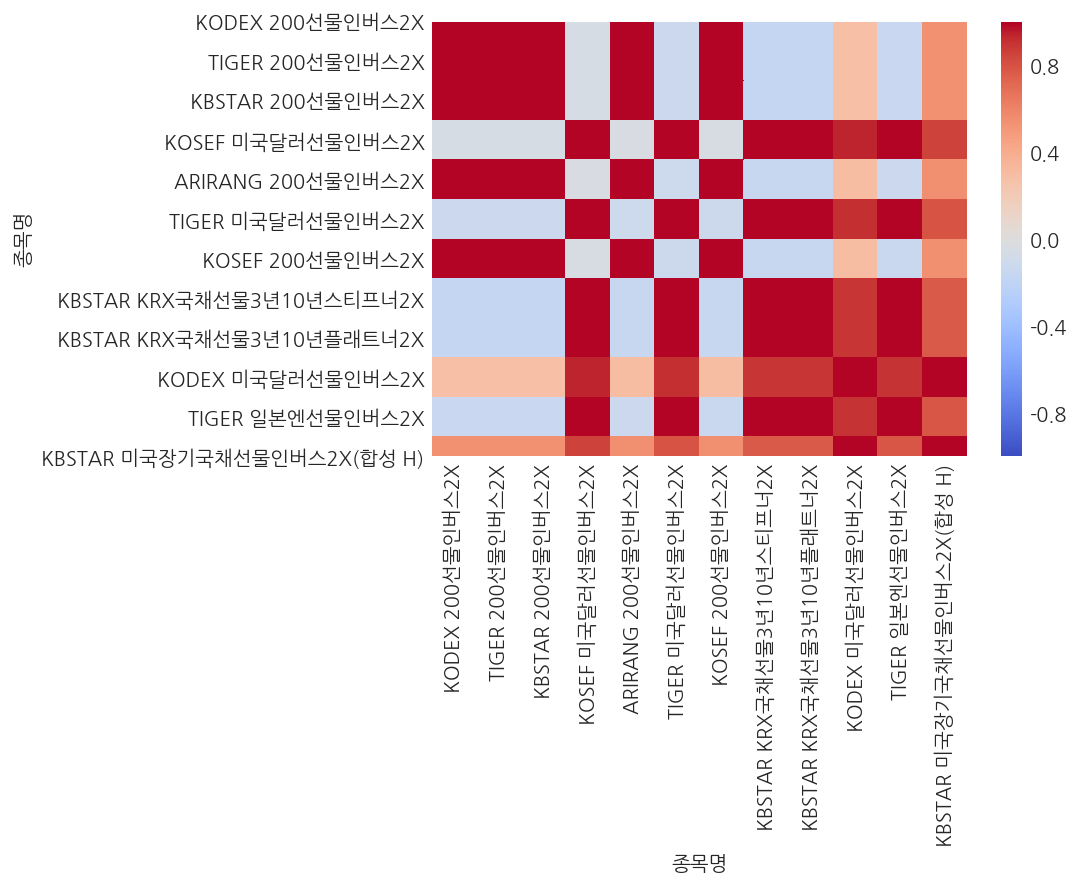

In [43]:
sns.heatmap(data=etf_corr_2x, cmap='coolwarm', vmax=1, vmin=-1)

<br>

### 12.8.3 heatmap에 mask 적용하기

In [47]:
mask_2x = np.triu(np.ones_like(etf_corr_2x))
mask_2x

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

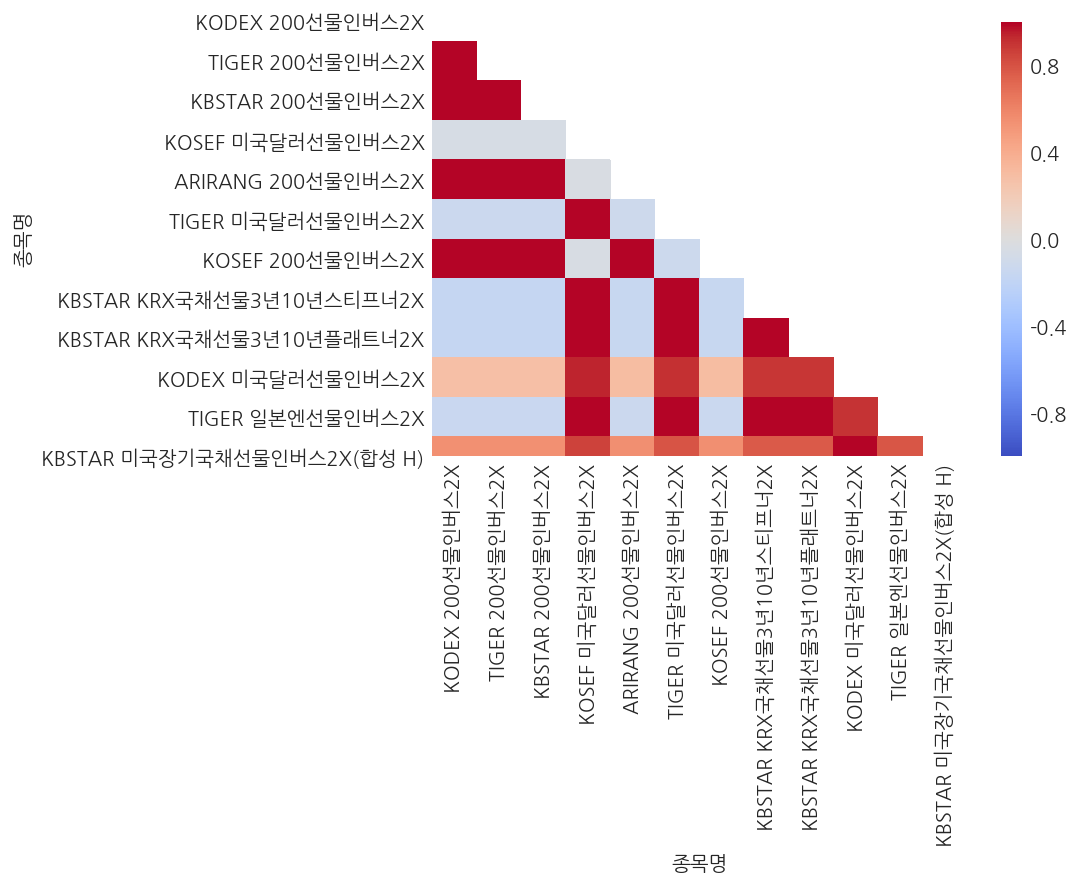

In [48]:
sns.heatmap(data=etf_corr_2x, cmap='coolwarm', vmax=1, vmin=-1, mask=mask_2x)

<br>

### 12.8.4 상관계수 값 표출하기 (`annot`)

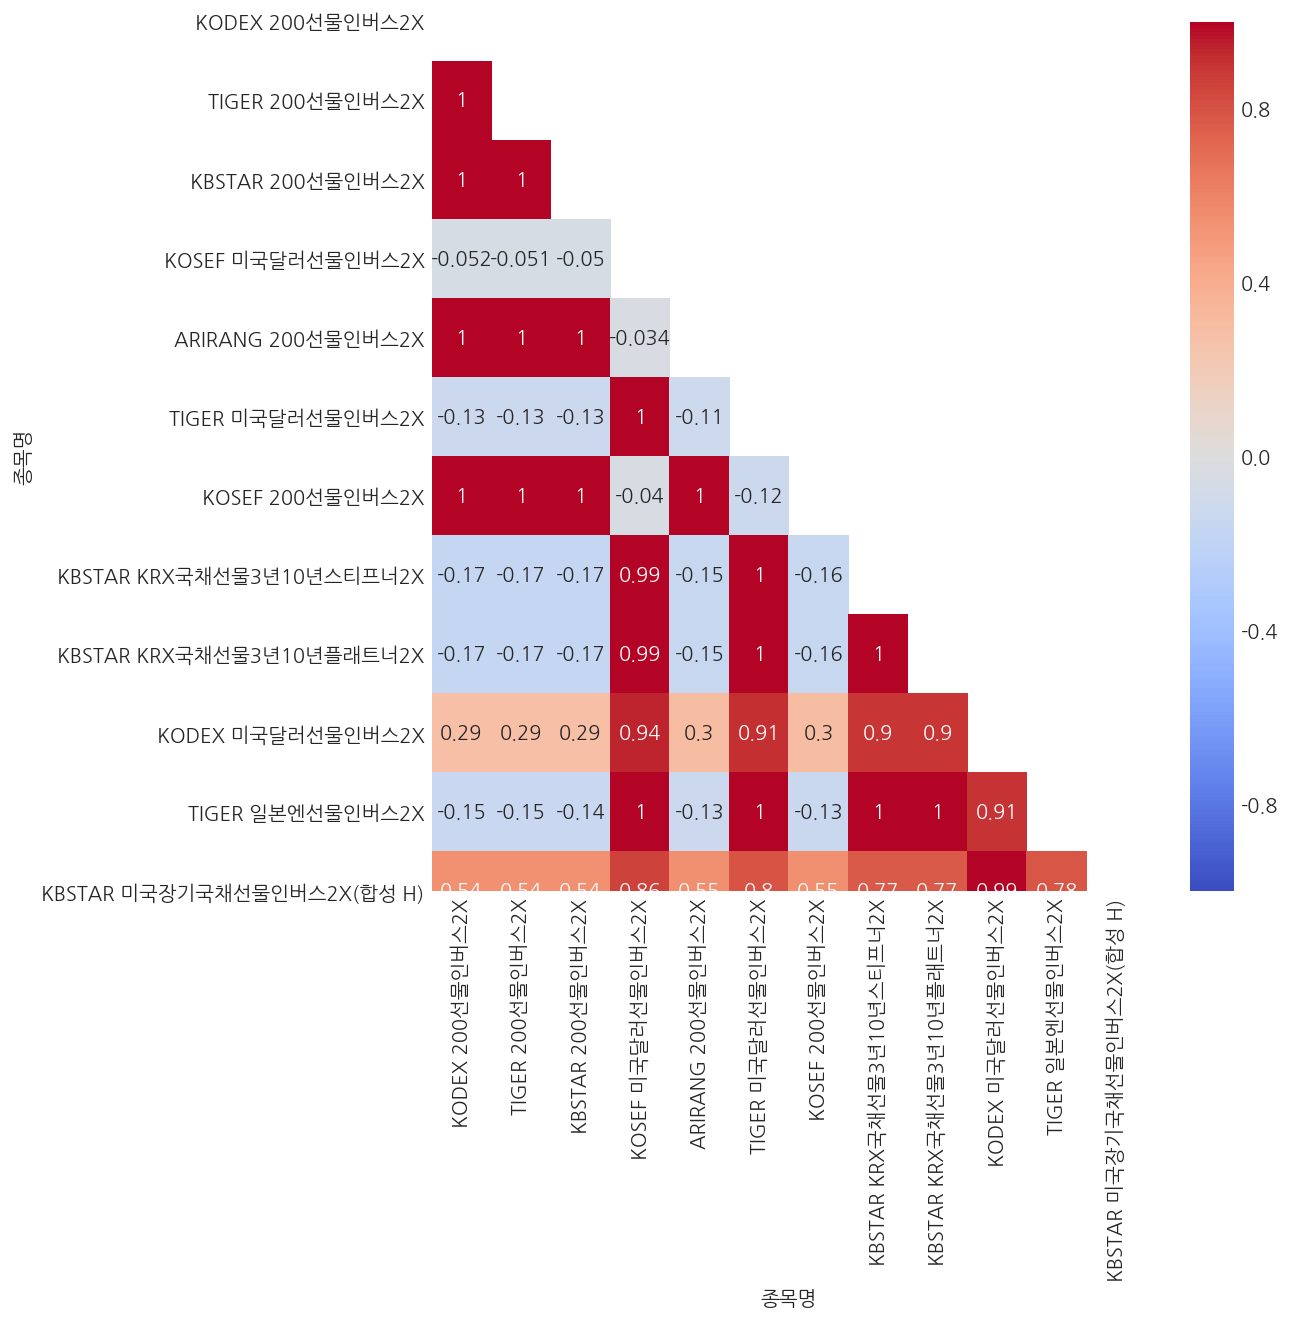

In [53]:
plt.figure(figsize=(8,8))
sns.heatmap(data=etf_corr_2x, cmap='coolwarm', vmax=1, vmin=-1, mask=mask_2x, annot=True)

<br>

## 12.9 원유 관련 ETF의 상관 계수

### 12.9.1 원유가 들어가 있는 상관계수만 가져오기

In [57]:
etf_corr_oil = etf_corr.filter(regex='원유').filter(regex='원유', axis=0)
etf_corr_oil

종목명,KODEX WTI원유선물(H),TIGER 원유선물Enhanced(H),KBSTAR 미국S&P원유생산기업(합성 H),TIGER 원유선물인버스(H),KODEX WTI원유선물인버스(H)
종목명,,,,,
KODEX WTI원유선물(H),1.000000,0.999984,0.999940,0.093910,0.754477
TIGER 원유선물Enhanced(H),0.999984,1.000000,0.999946,0.093193,0.753979
KBSTAR 미국S&P원유생산기업(합성 H),0.999940,0.999946,1.000000,0.103425,0.760690
TIGER 원유선물인버스(H),0.093910,0.093193,0.103425,1.000000,0.724264
KODEX WTI원유선물인버스(H),0.754477,0.753979,0.760690,0.724264,1.000000


<br>

### 12.9.2 heatmap 시각화 (mask 적용)

In [58]:
mask_oil = np.triu(np.ones_like(etf_corr_oil))
mask_oil

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

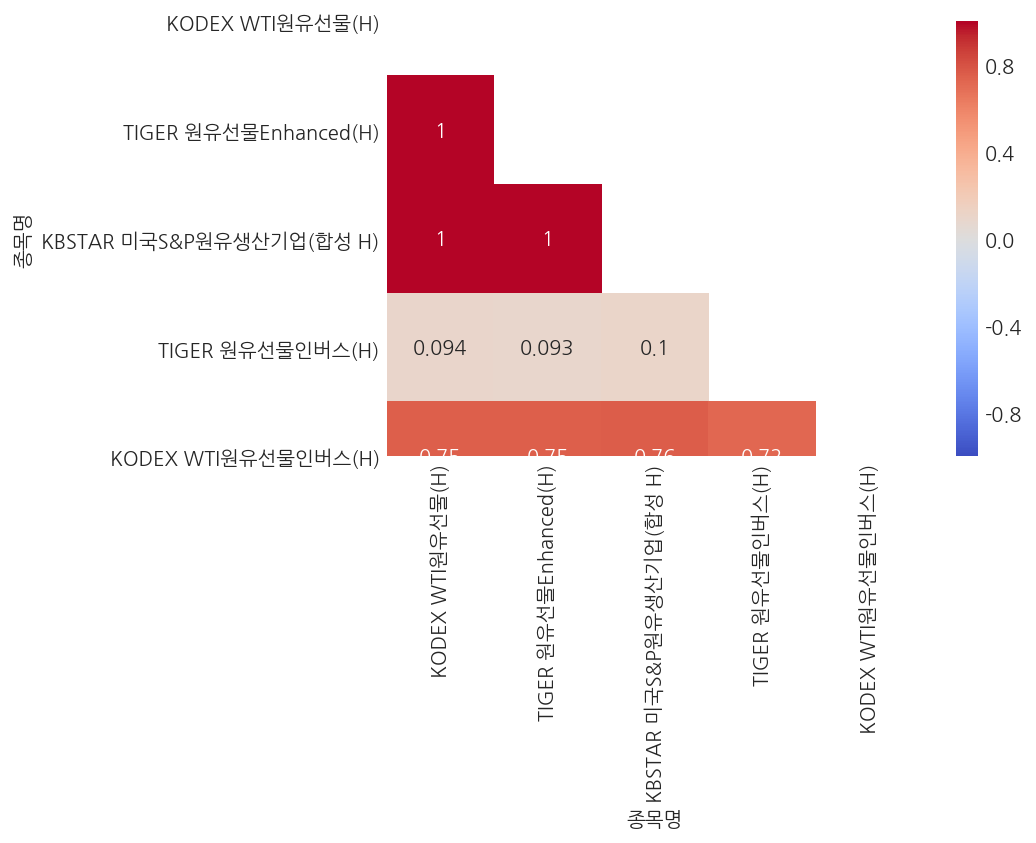

In [62]:
sns.heatmap(data=etf_corr_oil, cmap='coolwarm', vmax=1, vmin=-1, mask=mask_oil, annot=True)